In [1]:
from dace.sun import Sun
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import os
import numpy as np
import pickle
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/home/nhao/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-09-28 09:39:08,949 - WARNING - No .dacerc file found. You are requesting data in public mode. If you need to be connected, please create a .dacerc file in your home directory containing your api key. See README for details.


In [2]:
# Import data
with open('fluxes_AND_MORE_CRUCIAL_DATA.pic', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

(array([[ 59887.93538988,  63581.17796052,  72059.93512845, ...,
         168479.94228375, 168864.62039971, 167642.91795427],
        [ 64790.84536326,  68069.12289453,  78383.46824741, ...,
         179205.5925259 , 178797.52836841, 178936.07384035],
        [ 65664.04294074,  66579.44535267,  76504.27841198, ...,
         176453.73051712, 176112.57008305, 176392.25456113],
        ...,
        [ 53244.48408449,  56230.36750531,  64793.87733424, ...,
         151427.5879299 , 150231.6063517 , 150909.20477998],
        [ 51809.78144598,  54841.8947165 ,  62203.27381313, ...,
         146838.50000346, 146405.02749801, 146691.13137549],
        [ 53538.4793973 ,  56677.77265453,  64656.82403791, ...,
         151582.21006474, 151359.90743601, 151202.70961615]]),
 array([2457235.86722663, 2457235.08831722, 2457234.9530733 , ...,
        2457519.95603388, 2457519.89587695, 2457519.95978996]),
 array([3868.89459449, 3868.90517704, 3868.91575962, ..., 6912.98543252,
        6913.00434122, 69

In [5]:
folders= os.listdir("/home/nhao/Untar-ed_spectra_2015-2018")
folders

['2015-07-31',
 '2016-05-20',
 '2016-09-26',
 '2016-10-03',
 '2016-10-14',
 '2017-05-04',
 '2016-09-13',
 '2017-03-22',
 '2015-08-24',
 '2017-08-02',
 '2017-09-03',
 '2016-03-17',
 '2018-01-18',
 '2017-03-31',
 '2017-06-21',
 '2016-09-07',
 '2017-05-02',
 '2017-03-01',
 '2018-03-05',
 '2017-09-06',
 '2017-07-13',
 '2016-09-23',
 '2017-06-13',
 '2017-03-04',
 '2015-08-30',
 '2016-08-27',
 '2017-09-22',
 '2017-02-23',
 '2016-07-31',
 '2015-12-29',
 '2015-12-23',
 '2015-12-21',
 '2017-02-20',
 '2016-01-10',
 '2016-10-10',
 '2017-04-01',
 '2016-11-30',
 '2015-09-06',
 '2016-09-19',
 '.ipynb_checkpoints',
 '2018-02-21',
 '2016-07-02',
 '2017-02-07',
 '2015-08-19',
 '2016-09-04',
 '2017-10-10',
 '2016-06-15',
 '2017-08-27',
 '2017-02-03',
 '2017-07-03',
 '2016-08-02',
 '2017-03-13',
 '2017-01-02',
 '2017-04-29',
 '2017-01-10',
 '2017-09-04',
 '2016-08-06',
 '2016-11-24',
 '2016-08-21',
 '2015-10-08',
 '2015-10-28',
 '2016-05-29',
 '2015-09-11',
 '2017-08-23',
 '2017-06-29',
 '2016-06-20',
 '

In [14]:
fluxes = data[0]

fluxes

array([[ 59887.93538988,  63581.17796052,  72059.93512845, ...,
        168479.94228375, 168864.62039971, 167642.91795427],
       [ 64790.84536326,  68069.12289453,  78383.46824741, ...,
        179205.5925259 , 178797.52836841, 178936.07384035],
       [ 65664.04294074,  66579.44535267,  76504.27841198, ...,
        176453.73051712, 176112.57008305, 176392.25456113],
       ...,
       [ 53244.48408449,  56230.36750531,  64793.87733424, ...,
        151427.5879299 , 150231.6063517 , 150909.20477998],
       [ 51809.78144598,  54841.8947165 ,  62203.27381313, ...,
        146838.50000346, 146405.02749801, 146691.13137549],
       [ 53538.4793973 ,  56677.77265453,  64656.82403791, ...,
        151582.21006474, 151359.90743601, 151202.70961615]])

In [4]:
data[2].shape

(212207,)

In [5]:
wls = data[2]

In [6]:
wls = wls[np.where((wls>6400) & (wls < 6700))]
wls

array([6400.01659489, 6400.03410052, 6400.05160619, ..., 6699.94614955,
       6699.96447554, 6699.98280159])

In [7]:
len(wls)

16747

In [11]:
# check the size of fluxes
print(fluxes.shape)

(28415, 16747)


In [12]:
# normalzing flux

flux_normed = []

# flux is 2d array (check flux.shape, from array created before)
for f in fluxes:
    x = wls
    y = f # f here is a row in the 2d array fluxes

    # cut out data from 6525 - 6550 A
    loc1 = ((x > 6525) & (x < 6550)) # boolean array

    f_0 = f[loc1]

    # Calculates the 98th percentile
    normval = np.percentile(f_0, 98)
    flux_normed.append(f/normval)


len(flux_normed)

28415

In [13]:
flux_normed = np.array(flux_normed)

In [14]:
flux_normed.shape

(28415, 16747)

# try replacing outlier with average of 2 surrounding values

In [15]:
mean_flux = np.mean(flux_normed)

In [16]:
# modified code

import numpy as np

def approximate_outliers_vectorized(data, threshold=5):
    mean = data.mean()
    std = data.std()
    mask = np.abs(data - mean) >= threshold * std
    neighbors = np.zeros_like(data)

    for i in range(-1, 2):
        for j in range(-1, 2):
            if i != 0 or j != 0:
                neighbors += np.roll(data, (i, j), axis=(0, 1))

    return np.where(mask, neighbors / 8, data)

approximated_data = approximate_outliers_vectorized(flux_normed)


In [17]:
approximated_data.shape

(28415, 16747)

In [18]:
with open('norm_flux_filtered.pic', 'wb') as f:
    pickle.dump(approximated_data, f)

# Scaling and Standardization

In [8]:
with open('norm_flux_filtered.pic', 'rb') as f:
    # Load the data from the file
    flux_normed = pickle.load(f)

In [23]:
flux_normed.shape

(28415, 16747)

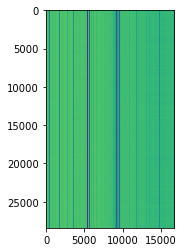

In [4]:
# labeled plot for normed flux after filtering out high noise data
plt.imshow(flux_normed)

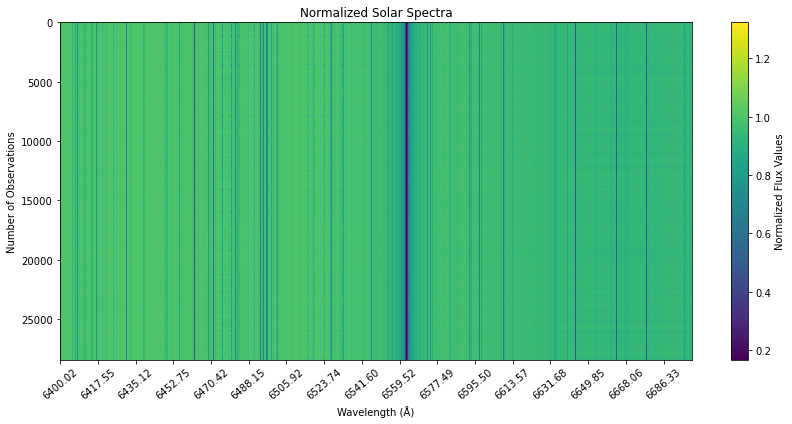

In [33]:
# Create a figure and axis with a custom aspect ratio
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize for your desired rectangle size

# Plot the flux_normed data
cax = ax.imshow(flux_normed, cmap='viridis', aspect='auto')  # Use 'auto' aspect ratio

# Set x and y ticks
ax.set_xticks(np.arange(0, len(wls), 1000))  # Adjust the spacing of x ticks as needed
ax.set_xticklabels([f'{w:.2f}' for w in wls[::1000]], rotation=40)  # Rotate x-axis labels if needed
# ax.set_yticks(np.arange(0, len(flux_normed), 1000))  # Adjust the spacing of y ticks as needed
# # ax.set_yticklabels(flux_normed[0, :][::1000])

# ax.set_yticklabels([f'{f:.2f}' for f in len(flux_normed)[::1000]])

# Add labels and title if desired
plt.xlabel('Wavelength (Å)')
plt.ylabel('Number of Observations')
plt.title('Normalized Solar Spectra')

# Show the plot
plt.colorbar(cax, label='Normalized Flux Values')  # Add colorbar if desired
plt.tight_layout()  # Ensure labels are visible
plt.savefig('normed_flux.png', dpi=300)
plt.show()

(28415, 16747)

In [26]:
flux_scaled = StandardScaler().fit_transform(flux_normed)

flux_scaled

array([[-1.26091312,  1.92366372,  1.7666164 , ..., -0.99117803,
        -0.74474361, -1.54140012],
       [-0.9766996 ,  2.88628219,  1.97034066, ..., -1.74413169,
        -2.0081112 , -1.90489528],
       [-1.72234518,  3.25410513,  2.16815572, ..., -1.71216618,
        -1.93788192, -1.743955  ],
       ...,
       [-1.25274665,  0.28964351,  0.14293175, ..., -0.50662654,
        -1.40673551, -0.88441507],
       [-1.17474538,  0.857546  ,  0.73496527, ..., -0.78533151,
        -1.12710835, -0.8901423 ],
       [-1.16577609,  1.06045771,  0.77652779, ..., -0.65249266,
        -0.82737005, -0.92630988]])

In [25]:
print(flux_scaled.shape)


(28415, 16747)


In [9]:
# The estimated number of components
pca.n_components_

1000

In [37]:
# 1000 principal components
pca_n1000 = PCA(n_components=1000, tol = .95)
pca_n1000.fit(np.transpose(flux_scaled))
fluxes_pca_n1000 = pca_n1000.transform(np.transpose(flux_scaled))
fluxes_pca_n1000

array([[-9.48573437e+01, -1.65509233e+01, -1.76868060e+00, ...,
         7.43174485e-01,  3.51264382e-01,  6.98759350e-02],
       [ 1.63457172e+02, -4.64352109e+01,  5.90091502e+01, ...,
        -2.47709805e-01, -4.40418422e-01,  1.96784447e-01],
       [ 1.61076803e+02, -4.21120682e+01,  6.12578110e+01, ...,
        -2.24657283e-02, -1.26471859e-01, -2.09854146e-01],
       ...,
       [-1.22963721e+02, -1.76958913e+00,  2.86853260e+01, ...,
        -5.96213429e-02, -4.17961986e-01,  1.24389364e-01],
       [-1.22839257e+02,  3.07071897e-01,  2.90184712e+01, ...,
         2.37194586e-01, -6.12482628e-03, -4.97035821e-01],
       [-1.22888079e+02,  1.44469986e+00,  2.84728683e+01, ...,
         5.16064700e-01,  8.59393055e-01, -2.37567547e-01]])

In [39]:
# convert to pandas dataframe
df_pca_n1000 = pd.DataFrame(fluxes_pca_n1000)

df_pca_n1000

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-94.857344,-16.550923,-1.768681,-2.410711,-12.340682,-12.105164,13.329835,8.203740,11.289893,-6.617236,...,1.160788,0.677761,0.305191,1.222551,1.473660,0.458924,1.569106,0.743174,0.351264,0.069876
1,163.457172,-46.435211,59.009150,-15.334309,19.717488,-0.747472,12.352835,6.859291,5.488580,15.891643,...,-0.044289,0.525915,-0.077275,0.787551,-0.119637,0.791044,0.667574,-0.247710,-0.440418,0.196784
2,161.076803,-42.112068,61.257811,-20.694584,20.337662,-2.119677,10.340770,16.296337,8.627806,8.097246,...,-0.473124,0.053955,-0.413681,0.537249,0.077050,0.150159,1.045896,-0.022466,-0.126472,-0.209854
3,159.613588,-43.908107,61.703278,-18.657546,18.506149,-3.252269,7.987215,19.176715,10.625663,4.336572,...,-0.532984,0.133150,-0.889715,0.984857,0.021408,-0.527546,1.074663,-0.317038,0.077645,0.056933
4,152.283068,-41.458517,22.181926,-6.611968,-7.693532,-9.857626,-2.004709,22.761732,12.880554,-21.127160,...,0.889690,0.080849,-2.772573,1.334036,0.087049,-1.382388,2.473762,-0.998657,1.780297,1.925984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16742,-122.027172,2.764767,26.867618,9.836400,-11.390175,-3.102987,9.487391,3.441069,5.113277,0.686081,...,0.936063,0.488797,0.277362,-0.351805,0.043550,0.325986,-0.329005,0.276380,-0.224215,-0.124834
16743,-123.053416,0.292818,28.320342,11.201994,-10.922369,-3.173495,10.756602,4.633809,3.120538,-0.400875,...,-0.052635,-0.785045,0.651737,-0.708943,0.404533,0.000213,0.592333,0.403017,0.376554,-0.205258
16744,-122.963721,-1.769589,28.685326,10.145999,-9.813284,-5.482439,8.219164,3.621328,5.245660,0.730140,...,0.033558,-1.118626,0.901345,0.030869,0.287599,0.325568,-0.287760,-0.059621,-0.417962,0.124389
16745,-122.839257,0.307072,29.018471,11.241024,-12.884565,-7.334646,11.036470,6.208247,5.834197,2.029161,...,0.415850,-0.465438,0.252501,-0.099624,0.361612,0.446094,-0.502715,0.237195,-0.006125,-0.497036


In [ ]:
# export data

dat = fluxes_pca_n1000, BJD_times, wls, start_times, end_times, exp_times
with open('filtered_fluxes_pca_1000.pic', 'wb') as f:
    pickle.dump(dat, f)

In [11]:
dat = fluxes_pca_n1000
with open('filtered_fluxes_pca_1000.pic', 'wb') as f:
    pickle.dump(dat, f)

In [36]:


fluxes_pca_n1000.shape


(28415, 1000)

In [40]:
len(wls)

16747

In [ ]:
fluxes_pca_n1000[:, :].shape

0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46362395789, 6699.982801592547]
0.0
5582.0
11164.0
16746.0
[6400.016594886473, 6498.482657482396, 6598.46

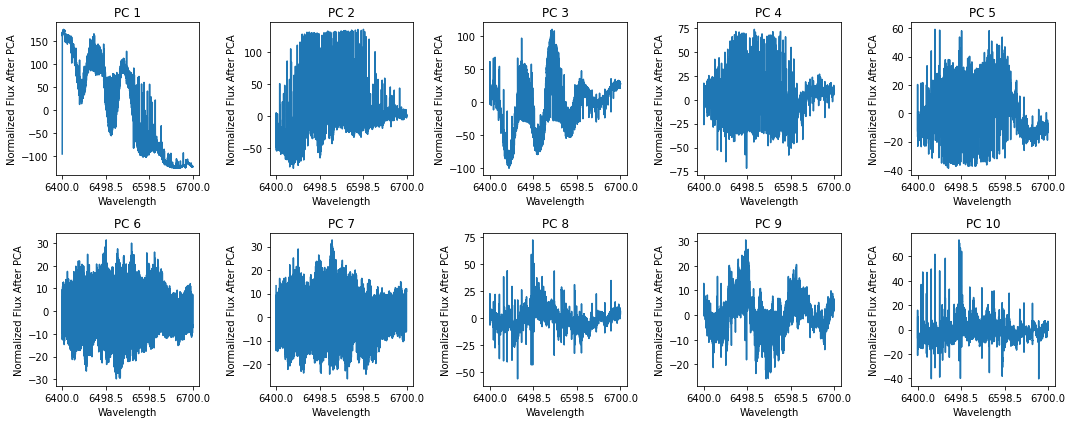

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Create a single figure with 10 subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
#fig.suptitle('Principal Components 1-10', fontsize=16)

# Iterate through the first 10 principal components
for i in range(10):
    row, col = divmod(i, 5)  # Calculate the subplot row and column
    pc = fluxes_pca_n1000[:, i]  # Select the i-th PC

    # Plot the component values in the appropriate subplot
    axes[row, col].plot(pc)
    axes[row, col].set_title(f'PC {i + 1}')
    axes[row, col].set_xlabel('Wavelength')
    axes[row, col].set_ylabel('Normalized Flux After PCA')
    
    axes[row, col].set_xticks(np.linspace(0,len(wls),4))  # Adjust the spacing of x ticks as needed
    
    x_ticklabels = []
    for i in np.linspace(0,len(wls)-1,4):
        print(i)
        ind = round(i)
        x_ticklabels.append(wls[ind])
        
    print(x_ticklabels)
    axes[row, col].set_xticklabels([f'{w:.1f}' for w in x_ticklabels]) 

# Adjust subplot spacing
plt.tight_layout()

# Save the combined plot as an image (e.g., PNG)
plt.savefig('combined_principal_components.png', dpi=300)

# Show the plot (optional)
plt.show()


In [45]:
np.linspace(0,len(wls),4)

array([    0.        ,  5582.33333333, 11164.66666667, 16747.        ])

In [34]:
pc = fluxes_pca_n1000[:, 0]
pc.shape

(28415,)

In [30]:
pca = PCA(n_components=1000)
pca.fit(flux_scaled)

X_new = pca.inverse_transform(pca.transform(flux_scaled))

In [35]:

X_0 = pca.inverse_transform(pca.transform(flux_scaled))

In [31]:
X_new.shape

(28415, 16747)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a single figure with 10 subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
#fig.suptitle('Principal Components 1-10', fontsize=16)

# Iterate through the first 10 principal components
for i in range(10):
    row, col = divmod(i, 5)  # Calculate the subplot row and column
    pc = fluxes_pca_n1000[:, i]  # Select the i-th PC

    # Plot the component values in the appropriate subplot
    axes[row, col].plot(pc)
    axes[row, col].set_title(f'PC {i + 1}')
    axes[row, col].set_xlabel('Wavelength')
    axes[row, col].set_ylabel('Normalized Flux After PCA')
    
    #axes[row, col].set_xticks(np.arange(0,len(wls), 3600))  # Adjust the spacing of x ticks as needed
    #axes[row, col].set_xticklabels([f'{w:.1f}' for w in wls]) 

# Adjust subplot spacing
plt.tight_layout()

# Save the combined plot as an image (e.g., PNG)
plt.savefig('combined_principal_components.png', dpi=300)

# Show the plot (optional)
plt.show()

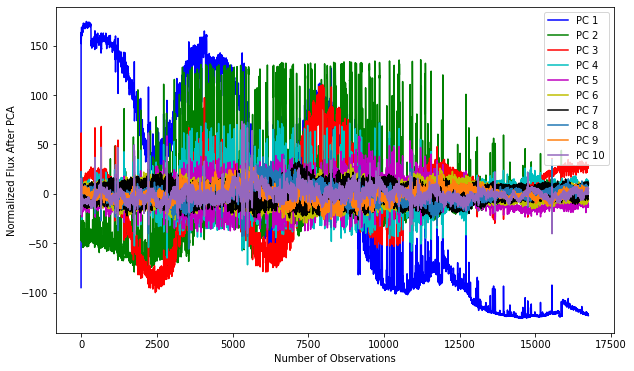

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming spectrum_data contains your PCA-transformed data with shape (n_samples, 10)
# Replace this with your actual data and PCA result

# Create a figure for the combined plot
plt.figure(figsize=(10, 6))
# plt.title('Principal Components 1-10')
plt.xlabel('Number of Observations')
plt.ylabel('Normalized Flux After PCA')

# Define a list of colors for the components
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:purple']

# Iterate through the first 10 principal components
for i in range(10):
    pc = fluxes_pca_n1000[:, i]  # Select the i-th PC
    color = colors[i]  # Get the color for the i-th PC
    
    # Plot the component values with a label for the legend
    plt.plot(pc, label=f'PC {i + 1}', color=color)

# Set custom tick locations and labels based on the wls array
# plt.xticks(np.arange(len(wls)), wls)

# Add a legend to distinguish the components
plt.legend()

# Save the combined plot as an image (e.g., PNG)
plt.savefig('combined_principal_components_color.png', dpi = 300)

# Show the plot (optional)
plt.show()
